Repeat exercise of classification challenge "Hello World of Machine Learning", from Geron Machine Learning Textbook


https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/


# Notebook Setup
Import few common modules

In [1]:
# to support both python and python 3
from __future__ import division, print_function, unicode_literals

In [2]:
#common imports

import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt

#to make this notebook's output stable across all runs

np.random.seed(42)

#where to save the figures

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification_MNIST"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Import the MNIST Data

MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census
Bureau.

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [4]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

# A little bit about the data

The dataset is already split into feature data and target data

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. 
The images are 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black).

Saving figure image_review.....


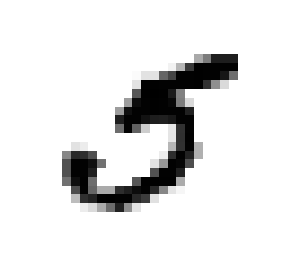

In [8]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
save_fig("image_review.....")
plt.show()

In [9]:
y[36000]

5.0

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    return save_fig("additional picture"), plt.show()

Saving figure additional picture


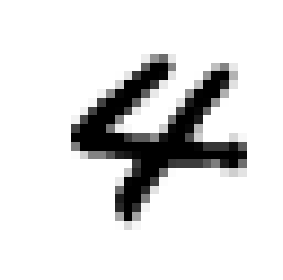

(None, None)

In [11]:
plot_digit(X[26001])

In [12]:
#Extra for plotting lots of figures

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows =(len(instances)-1) //  images_per_row +1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row :(row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis = 1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


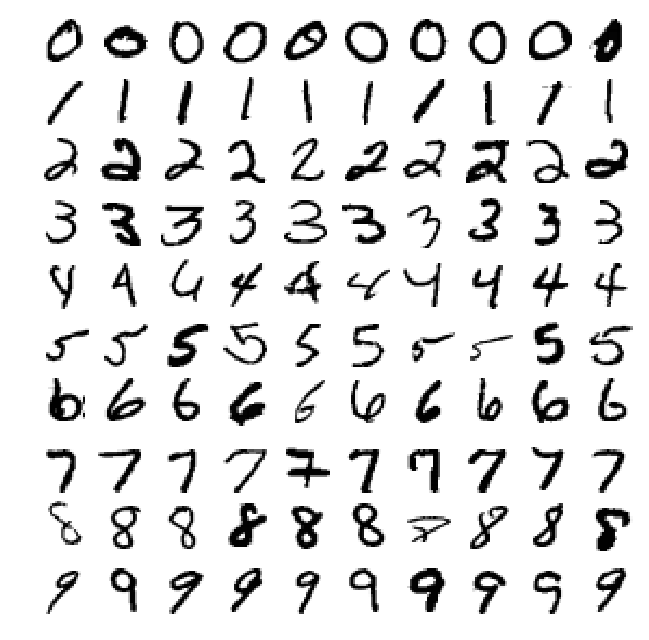

In [13]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

# Split data into training and test sets

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

5 Detector models

In [16]:
y_train_5 = (y_train == 5)
y_test = (y_test == 5)

# Instantiate the model
Stochastic
Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class.

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(max_iter=5, random_state = 42)

In [19]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

# Evaluating model performance

Measuring classification performance is more challenging than regression. 

# 1. Cross Validation, with k-fold

cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. 
K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds

In [24]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring= "accuracy")

array([0.9502 , 0.96565, 0.96495])

# 2. Confussion Matrix
cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions
made on each test fold. p 84

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

 The first row of this matrix considers non-5 images (the negative class): 53,272 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1,307 were wrongly classified as 5s (false positives).The second row considers the images of 5s (the positive class): 1,077 were wrongly classified as non-5s (false negatives), while the remaining 4,344 were correctly classified as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):
 
 for perfect prediction y_train prediction == y_train _5

In [31]:
y_train_perfect_predictions = y_train_5

In [32]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# 3. Precision and recall


precision = TP / (TP + FP); true positive, false positive; 

recall = TP /(TP + FN); false, negative


In [33]:
from sklearn.metrics import precision_score, recall_score

In [35]:
precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [36]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall

F1 = 2/((1/precision)+(1/recall))

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_train_5, y_train_pred)

0.7846820809248555

# Precision recall/trade-off

In [40]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [41]:
threshold = 0

In [48]:
y_some_digit_pred = (y_scores > threshold)

In [49]:
y_some_digit_pred

array([ True])

In [51]:
# The SGD Classifier uses a threshold of 0, hence code is true; with threshold raised:

In [52]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions:

In [53]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [54]:
y_scores.shape

(60000,)

In [58]:
if y_scores.ndim ==2:
    y_scores = y_scores[:, 1]

with scores compute precision and recall for all possible thresholds using the precision_recall_curve() function:

In [59]:
from sklearn.metrics import precision_recall_curve

In [60]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


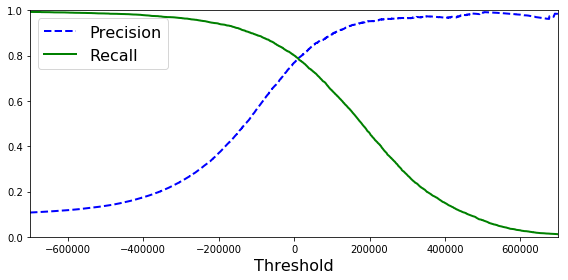

In [62]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()


Another way to select a good precision/recall tradeoff is to plot precision directly against recall

Saving figure precision_vs_recall_plot


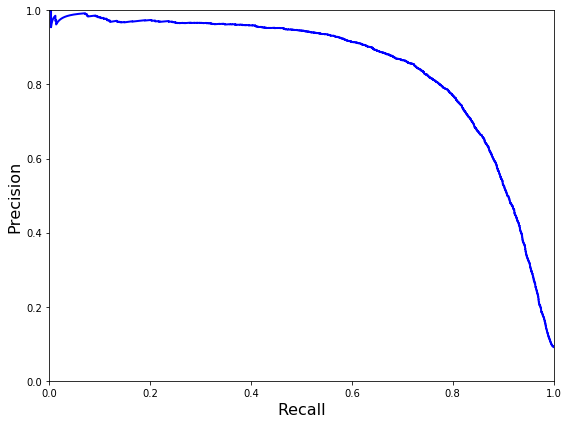

In [63]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize =16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize = (8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# 4. The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.

the ROC curve plots the true positive rate (TPR) (another name for recall) against the false positive rate (FPR)

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function:

pg 91

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [65]:
# Then you can plot the FPR against the TPR using Matplotlib.

Saving figure roc_curve_plot


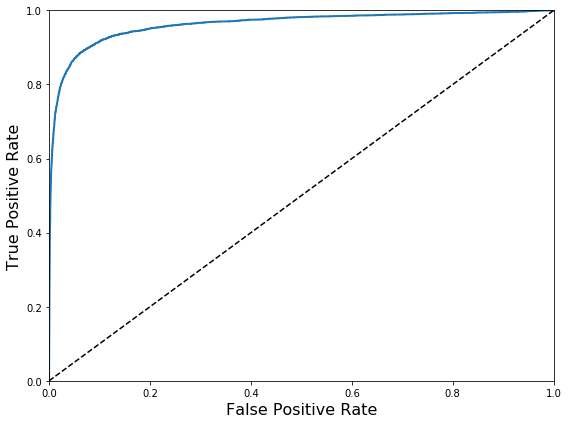

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)

plt.figure(figsize = (8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

# the higher the recall (TPR), the more false positives (FPR) the classifier produces.

One way to compare classifiers is to measure the area under the curve (AUC). A perfect
classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC:

In [67]:
from sklearn.metrics import roc_auc_score

In [68]:
roc_auc_score(y_train_5, y_scores)

0.9624496555967155

In [69]:
#compare SGDClassiffier and RandomForrestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [72]:
y_scores_forest = y_probas_forest[:, 1] #score = probab of postive class

In [73]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Saving figure roc_curve_comparison_plot


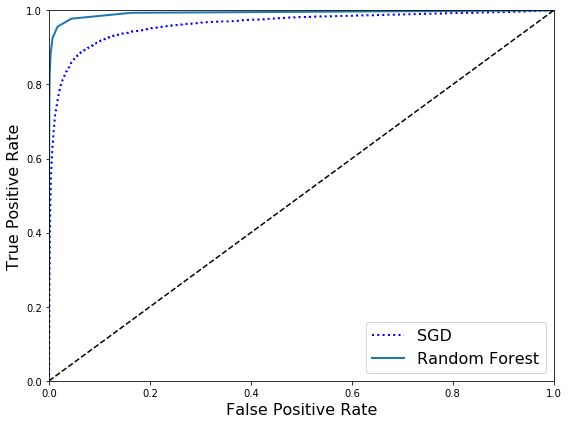

In [74]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner. As a result, its ROC AUC score is also significantly better

In [75]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

measuring the precision and recall scores: you should find 98.5% precision and 82.8% recall.

In [76]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [77]:
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [78]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383